In [1]:
import tensorflow as tf
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]=''
%matplotlib inline

In [2]:
dirimg = "/data3/bdd100k/images/100k/val/"
labeldir = "/data3/bdd100k/"
labelfile ="labels/bdd100k_labels_images_val.json"

cocoimg = "/data1/dataset/coco/"
#cocolabel = "/data1/dataset/coco/annotations/instances_val2017.json"
cocolabel = "/data1/dataset/coco/annotations/instances_train2017.json"

In [87]:
filename = os.path.join(labeldir, labelfile)
print(filename)

   


/data3/bdd100k/labels/bdd100k_labels_images_val.json


In [3]:
with open(cocolabel,'r') as load_f:
    load_dict = json.load(load_f)

In [34]:
with open(filename,'r') as load_f:
    load_dict = json.load(load_f)


In [4]:
for item in load_dict:
    print(len(item))
imgs = load_dict['images'] 
print(len(imgs))
imgnamedict={}
for img in imgs:
    imgnamedict[img['id']]=img['file_name']
    #print(img['id'])
#print(imgnamedict[439994])    
print(len(imgnamedict))
print(len(load_dict['annotations'] ))
coco_categories_dict_t={1:'person',2:'bicycle',3:'car',4:'motorcycle',6:'bus',7:'train',8:'truck'}
coco_categories_dict={'1':'person','2':'bicycle','3':'car','4':'motorcycle','6':'bus','7':'train','8':'truck'}
print(coco_categories_dict_t[1])
"""
{  "area": 1481.3806499999994, # 区域面积
"iscrowd": 0, # 
"image_id": 397133, # 对应的图片ID（与images中的ID对应） 
"bbox": [217.62,240.54,38.99,57.75], # 定位边框 [x,y,w,h] 
"category_id": 44, # 类别ID（与categories中的ID对应） 
"id": 82445 # 对象ID，因为每一个图像有不止一个对象，所以要对每一个对象编号（每个对象的ID是唯一的） },


"""
aimdict={}
for annotation in load_dict['annotations']:
    if annotation['image_id'] in aimdict:
        imglabels = aimdict[annotation['image_id']]
    else:
        imglabels =[]
    
    labeldict={}
    if annotation['category_id'] in coco_categories_dict_t and annotation['iscrowd']==0 :
        labeldict['name']=coco_categories_dict_t[annotation['category_id']]
        labeldict['bbox']=annotation['bbox']
        labeldict['area']=annotation['area']
        imglabels.append(labeldict)
        aimdict[annotation['image_id']] = imglabels
print("aimdict",len(aimdict))   
#print("aimdict",aimdict[15517]) 
#print("imgdict",imgnamedict[15517]) 
#print(load_dict['categories'] )

11
6
8
4
10
118287
118287
860001
person
aimdict 71749


b1dac7f7-6b2e0382.jpg
(720, 1280, 3)
b1db7e22-cfa74dc3.jpg
(720, 1280, 3)
b1dce572-c6a8cb5e.jpg
(720, 1280, 3)
b1dd58c1-8b546ba7.jpg
(720, 1280, 3)
i get img num: 10000


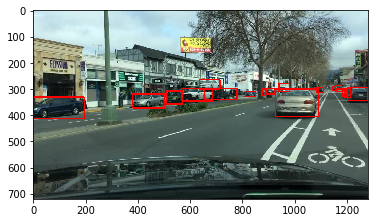

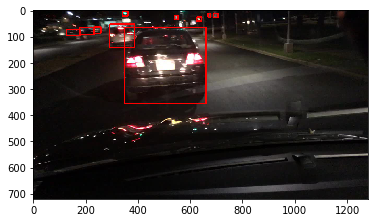

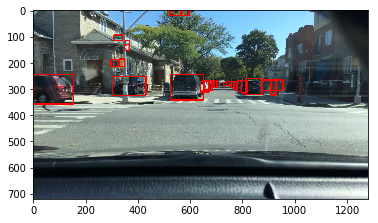

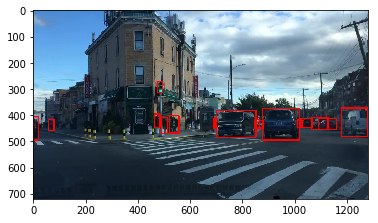

In [73]:
cnt=0
for img in load_dict:
    imgname = img['name']
    if cnt>50 and cnt<55:
        print(imgname)
        image2 = cv2.imread(dirimg+imgname).astype(np.uint8)
        image2 =  np.array(image2)
        image_data2 = image2[...,[2,1,0]]
        image_data = image_data2.copy()# error on draw rect
        #image_data = image2 
        print(image_data.shape)
        imglabels=img['labels']
        for label in imglabels:
            if 'box2d' in label:
                #print(label['category'],"---",label['box2d'])
                box = label['box2d']
                cv2.rectangle(image_data,(int(box['x1']),int(box['y1'])),(int(box['x2']),int(box['y2'])),(255,0,0),3)
        plt.figure()
        plt.imshow(image_data)

    cnt=cnt+1
#print(image_data)
print("i get img num:",cnt) 

aimdict 71749
000000393362.jpg
(426, 640, 3)
90556.18580000004
6324.7226
20760.18795
000000524436.jpg
(424, 640, 3)
8405.63065
34107.95845
773.2323999999999
1973.0420000000008
2772.70665
26834.674399999996
36282.86245
12394.899650000001
19971.143249999997
3238.256
246.05859999999984
567.7655000000001
000000000149.jpg
(428, 640, 3)
72.21484999999986
59.35394999999989
62.70220000000004
75.05845000000012
89.00045000000013
45.768649999999624
33.9745
37.51504999999976
26.96630000000001
106.9234999999997
49.819000000000095
48.754650000000304
26.480300000000206
84.69025000000016
85.03095000000002
131.00289999999993
000000471373.jpg
(428, 640, 3)
2322.88785
000000000151.jpg
(640, 480, 3)
1117.22285
75112.09055
000000131225.jpg
(480, 640, 3)
129911.26514999999
2257.14285
000000262299.jpg
(360, 640, 3)
14887.864400000006
9926.431999999999
7144.762299999998
000000393372.jpg
(640, 480, 3)
166387.3438
000000393375.jpg
(427, 640, 3)
1051.0136
000000401541.jpg
(427, 640, 3)
79159.39035
7634.696000000

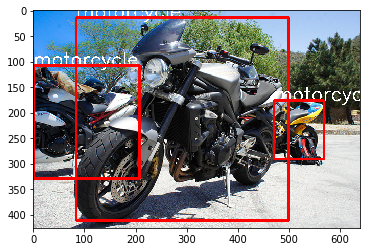

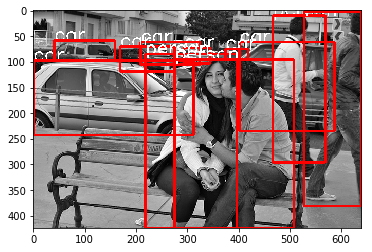

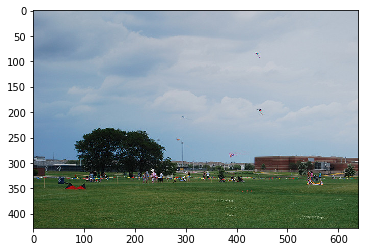

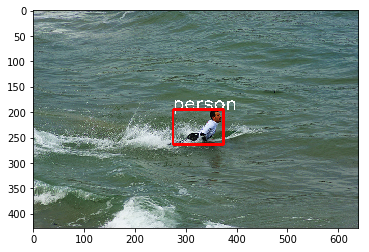

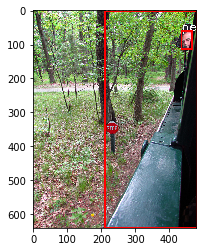

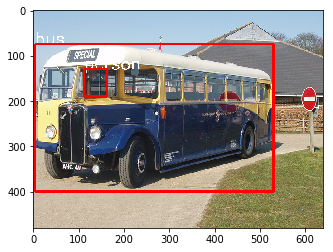

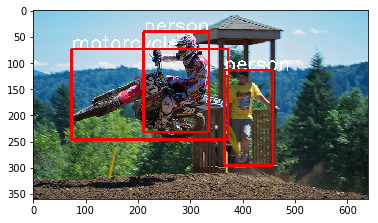

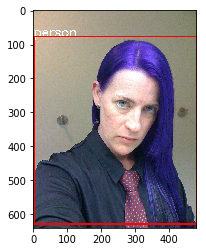

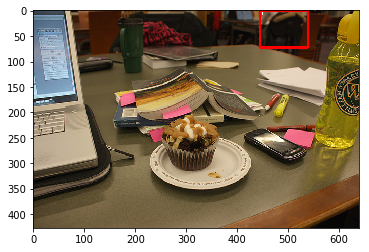

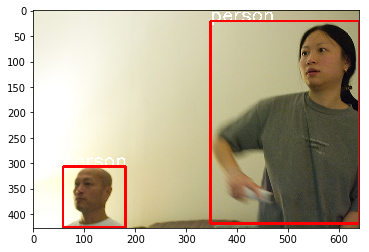

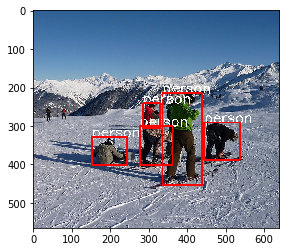

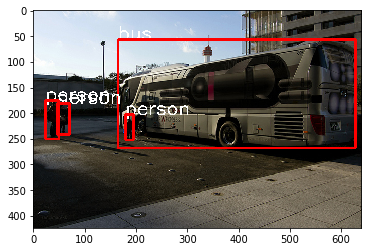

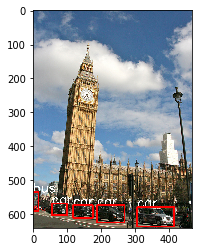

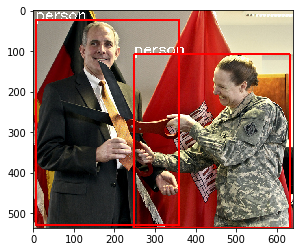

In [5]:
#coco data
print("aimdict",len(aimdict))   
#print("aimdict",aimdict[15517]) 
#print("imgdict",imgnamedict[15517]) 
cocoimgdir = "/data1/dataset/coco/images/"
cnt=0
for imgid in aimdict:
    imgname = imgnamedict[imgid]
    if cnt>80 and cnt<95:
        print(imgname)
        image2 = cv2.imread(cocoimgdir+imgname).astype(np.uint8)
        image2 =  np.array(image2)
        image_data2 = image2[...,[2,1,0]]
        image_data = image_data2.copy()# error on draw rect
        #image_data = image2 
        print(image_data.shape)
        imglabels = aimdict[imgid]
        for label in imglabels:
            if 'bbox' in label:
                #print(label['category'],"---",label['box2d'])
                box = label['bbox']
                boxname = label['name']
                print(label['area'])
                if label['area']>500:
                    cv2.putText(image_data, boxname, (int(box[0]),int(box[1])), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 2)
                    cv2.rectangle(image_data,(int(box[0]),int(box[1])),(int(box[0]+box[2]),int(box[1]+box[3])),(255,0,0),3)
        plt.figure()
        plt.imshow(image_data)

    cnt=cnt+1
#print(image_data)
print("i get img num:",cnt) 

In [77]:
len(load_dict)
print(load_dict[1]['name'])


b1c81faa-3df17267.jpg


In [81]:
BDD100K_LABELS = {
    'none': (0, 'Background'),
    'motor': (1, 'Vehicle'),
    'rider': (2, 'Vehicle'),
    'car': (3, 'Vehicle'),
    'traffic sign': (4, 'Traffic'),
    'traffic light': (5, 'Traffic'),
    'bus': (6, 'Vehicle'),
    'train': (7, 'Vehicle'),
    'truck': (8, 'Vehicle'),
    'bike': (9, 'Vehicle'),
    'person': (10, 'Person'),
}
print(BDD100K_LABELS['traffic sign'][0])


4


In [88]:
x=[[ 0.50824779  0.66349065  0.58034724  0.70264804]
 [ 0.5430544   0.4942745   0.55797154  0.50686079]
 [ 0.52316493  0.49567294  0.5480268   0.5082593 ]
 [ 0.45852405  0.4439292   0.49333066  0.48448509]]
print(x[1][3])

SyntaxError: invalid syntax (<ipython-input-88-79fe937e4e78>, line 1)